<a href="https://colab.research.google.com/github/mdssumin/SmartFactory_with_MDSTech_2nd/blob/main/Safety_Helmet_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wooyoungkkwon","key":"0dd7c11f0b34e99968de0ac386364fc4"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                                                                           deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/asl-fingerspelling                                        2023-08-24 23:59:00  Research          $200,000        805           False  
https://www.kaggle.com/competitions/icr-identify-age-related-conditions                       2023-08-10 23:59:00  Featured           $60,000       5860           False  
https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries                      2023-10-11 23:59:00  Featured           $60,000        284           False  
https://www.kaggle.com/competitions/bengaliai-speech                                          2023-10-17 23:59:00  Research           $53,000    

In [ ]:
!kaggle datasets download -d andrewmvd/hard-hat-detection

100% 1.22G/1.22G [00:12<00:00, 171MB/s]
100% 1.22G/1.22G [00:12<00:00, 108MB/s]


In [ ]:
%cd /content
!unzip hard-hat-detection.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: images/hard_hat_workers0.png  
  inflating: images/hard_hat_workers1.png  
  inflating: images/hard_hat_workers10.png  
  inflating: images/hard_hat_workers100.png  
  inflating: images/hard_hat_workers1000.png  
  inflating: images/hard_hat_workers1001.png  
  inflating: images/hard_hat_workers1002.png  
  inflating: images/hard_hat_workers1003.png  
  inflating: images/hard_hat_workers1004.png  
  inflating: images/hard_hat_workers1005.png  
  inflating: images/hard_hat_workers1006.png  
  inflating: images/hard_hat_workers1007.png  
  inflating: images/hard_hat_workers1008.png  
  inflating: images/hard_hat_workers1009.png  
  inflating: images/hard_hat_workers101.png  
  inflating: images/hard_hat_workers1010.png  
  inflating: images/hard_hat_workers1011.png  
  inflating: images/hard_hat_workers1012.png  
  inflating: images/hard_hat_workers1013.png  
  inflating: images/hard_hat_workers1014.png  
  inflating: images/hard_hat_worke

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile
import os

In [ ]:
!mkdir -p Dataset/labels
!mkdir -p Dataset/images

In [ ]:
classes = ['helmet','head','person']

In [ ]:
def convert_annot(size , box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

In [ ]:
def save_txt_file(img_jpg_file_name, size, img_box):
    save_file_name = '/content/Dataset/labels/' +  img_jpg_file_name + '.txt'
    print(save_file_name)
    #file_path = open(save_file_name, "a+")
    with open(save_file_name ,'a+') as file_path:
        for box in img_box:

            cls_num = classes.index(box[0])

            new_box = convert_annot(size, box[1:])

            file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

        file_path.flush()
        file_path.close()

In [ ]:
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    #print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data

    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)

        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])


    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_txt_file(img_xml_file, [img_w, img_h], img_box)

In [ ]:
!ls /content/Dataset/labels

In [ ]:
files = os.listdir('/content/hard-hat-detection/annotations')
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    print(file_xml[0])
    get_xml_data('/content/hard-hat-detection/annotations', file_xml[0])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
hard_hat_workers1246
/content/Dataset/labels/hard_hat_workers1246.txt
file name:  hard_hat_workers4947.xml
hard_hat_workers4947
/content/Dataset/labels/hard_hat_workers4947.txt
file name:  hard_hat_workers2534.xml
hard_hat_workers2534
/content/Dataset/labels/hard_hat_workers2534.txt
file name:  hard_hat_workers2951.xml
hard_hat_workers2951
/content/Dataset/labels/hard_hat_workers2951.txt
file name:  hard_hat_workers1903.xml
hard_hat_workers1903
/content/Dataset/labels/hard_hat_workers1903.txt
file name:  hard_hat_workers2025.xml
hard_hat_workers2025
/content/Dataset/labels/hard_hat_workers2025.txt
file name:  hard_hat_workers1174.xml
hard_hat_workers1174
/content/Dataset/labels/hard_hat_workers1174.txt
file name:  hard_hat_workers2752.xml
hard_hat_workers2752
/content/Dataset/labels/hard_hat_workers2752.txt
file name:  hard_hat_workers2129.xml
hard_hat_workers2129
/content/Dataset/labels/hard_hat_workers2129.txt
file name:  hard_hat_workers2321.xml
h

In [ ]:
from sklearn.model_selection import train_test_split
image_list = os.listdir('/content/hard-hat-detection/images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=42)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=42)
print('total =',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total = 5000
train : 4000
val   : 500
test  : 500


In [ ]:
def copy_data(file_list, img_labels_root, imgs_source, mode):

    root_file = Path( '/content/Dataset/images/'+  mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    root_file = Path('/content/Dataset/labels/' + mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    for file in file_list:
        img_name = file.replace('.png', '')
        img_src_file = imgs_source + '/' + img_name + '.png'
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        #print(img_sor_file)
        #print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = '/content/Dataset/images/'  + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = '/content/Dataset/labels/' + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [ ]:
copy_data(train_list, '/content/Dataset/labels', '/content/hard-hat-detection/images', "train")
copy_data(val_list,   '/content/Dataset/labels', '/content/hard-hat-detection/images', "val")
copy_data(test_list,  '/content/Dataset/labels', '/content/hard-hat-detection/images', "test")

Path /content/Dataset/images/train does not exit
Path /content/Dataset/labels/train does not exit
Path /content/Dataset/images/val does not exit
Path /content/Dataset/labels/val does not exit
Path /content/Dataset/images/test does not exit
Path /content/Dataset/labels/test does not exit


In [ ]:
!ls /content/Dataset/images

test  train  val


In [ ]:
!!git clone https://github.com/ultralytics/yolov5
%cd yolov5

/content/yolov5


In [ ]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
import yaml

dict_file = {'train':'/content/Dataset/images/train' ,
            'val': '/content/Dataset/images/val',
            'nc' : '3',
            'names' : ['helmet','head','person']}

with open('/content/yolov5/data/hard_head.yaml', 'w+') as file:
    documents = yaml.dump(dict_file, file)

In [ ]:
!python train.py --img 416 --batch 32 --epochs 30 --data data/hard_head.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/hard_head.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.

In [ ]:
!python detect.py --source /content/Dataset/images/test  --weights yolov5s.pt --conf 0.25

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['yolov5s.pt'], source=/content/Dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 

In [ ]:
from IPython.display import Image

<function matplotlib.pyplot.show(close=None, block=None)>

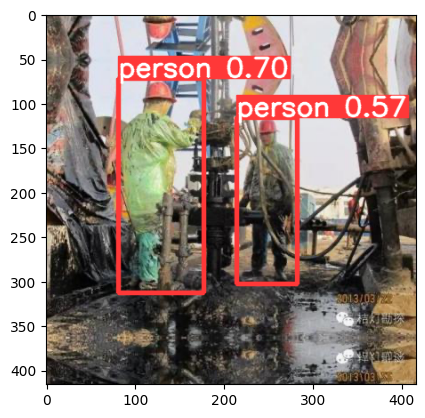

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
testfiles = glob('runs/detect/exp/*')

img = plt.imread(testfiles[25])
plt.imshow(img)
plt.show